In [1]:
# import the essential libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer


In [2]:
import pandas as pd
import random

# Base data for HIPAA violations (1s) and non-violations (0s)
base_data_hipaa = [
    # HIPAA Violation (1) - Focus on Patient History
    ("The patient's previous surgeries are important for this treatment.", 1),
    ("We should review the patient's allergy history before prescribing.", 1),
    ("The patient's past diagnoses need to be considered.", 1),
    ("Please update the patient's history of chronic illnesses.", 1),
    ("We need to include the patient's genetic history in the report.", 1),
    ("The patient has a family history of heart disease.", 1),
    ("Let's go over the patient's history of mental health issues.", 1),
    ("The patient's previous hospitalizations should be documented.", 1),
    ("We need to consider the patient's history of medication reactions.", 1),
    ("The patient has a history of diabetes that needs to be monitored.", 1),
    ("Let's update the patient's record with their recent health checkup results.", 1),
    ("We need to verify the patient's history of immunizations.", 1),
    ("The patient's family history of cancer needs to be evaluated.", 1),
    ("We should document the patient's history of tobacco use.", 1),
    ("The patient's history of surgeries needs to be included in the treatment plan.", 1),
    ("Please add the patient's history of respiratory issues to their file.", 1),
    ("The patient's history of alcohol use should be considered.", 1),
    ("Let's review the patient's history of blood transfusions.", 1),
    ("The patient has a history of hypertension; we need to monitor that.", 1),
    ("We need to check the patient's history of heart disease.", 1),
    ("We need to check the patient's history of lungs disease.", 1),
    ("We need to check the patient's history of teeth disease.", 1),
    ("We need to check the patient's history of nose disease.", 1),
    ("We need to check the patient's history of hair disease.", 1),
    ("We need to check the patient's history of tongue disease.", 1),
    ("We need to check the patient's history of hands disease.", 1),
    ("We need to check the patient's history of legs disease.", 1),
    ("We need to check the patient's history of knee disease.", 1),
    ("We need to check the patient's history of neck disease.", 1),
    ("We need to check the patient's history of fingers disease.", 1),
    ("We need to check the patient's history of nail disease.", 1),
    ("We need to check the patient's history of lips disease.", 1),
    ("We need to check the patient's history of eyes disease.", 1),
    ("We need to check the patient's history of head disease.", 1),
    ("We need to check the patient's history of toe disease.", 1),
    ("We need to check the patient's history of backbone disease.", 1),
    ("We need to check the patient's history of stomach disease.", 1),
    ("We need to check the patient's history of pancrease disease.", 1),
    
    ("Let's discuss the logistics for the upcoming festival.", 0),
    ("Let's discuss the logistics for the upcoming conference.", 0),
    ("Let's discuss the logistics for the upcoming seminar.", 0),
    ("Let's discuss the logistics for the upcoming project.", 0),
    ("Let's discuss the logistics for the upcoming campaign.", 0),
    ("Let's discuss the logistics for the upcoming launch.", 0),
    ("We should plan the marketing strategy for the next quarter.", 0),
    ("Let's discuss the budget allocation for the new project.", 0),
    ("The client's feedback on the recent campaign was positive.", 0),
    ("We need to finalize the details for the upcoming conference.", 0),
    ("Let's review the quarterly sales figures.", 0),
    ("We should update the team on the new software implementation.", 0),
    ("Let's schedule a meeting to discuss the new product launch.", 0),
    ("We need to prepare the presentation for the board meeting.", 0),
    ("The project deadline needs to be extended.", 0),
    ("Let's discuss the recruitment plan for the next quarter.", 0),
    ("We should analyze the recent customer survey results.", 0),
    ("The marketing team needs to revise the campaign strategy.", 0),
    ("We need to prepare for the upcoming audit.", 0),
    ("Let's update the website with the latest product information.", 0),
    ("We should plan the team-building activities for next month.", 0),
    ("The financial report needs to be submitted by Friday.", 0),
    ("We should discuss the new partnership opportunities.", 0),
    ("Let's review the latest industry trends.", 0),
    ("We need to improve the customer support process.", 0),
    ("Let's discuss the logistics for the upcoming event.", 0)
]
# Generate 1000 more rows
generated_data = [random.choice(base_data_hipaa) for _ in range(2000)]

# Convert to DataFrame
data= pd.DataFrame(generated_data, columns=["text", "label"])

# Save to CSV
data.to_csv("HIPPA_dataset.csv", index=False)

In [3]:
data

,text,label
0,Please add the patient's history of respirator...,1
1,We need to include the patient's genetic histo...,1
2,Let's update the website with the latest produ...,0
3,The patient's previous surgeries are important...,1
4,We need to check the patient's history of tong...,1
...,...,...
1995,Let's discuss the logistics for the upcoming e...,0
1996,Let's update the website with the latest produ...,0
1997,We need to check the patient's history of knee...,1
1998,We need to include the patient's genetic histo...,1


In [4]:
TFIDF_data=data.copy()

In [5]:
import re
import string
stemmer=PorterStemmer()

def textpreprocess(text):
    review = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    review = review.lower()  # Convert to lowercase
    review = review.split()  # Split into words
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]  # Stemming and removing stopwords
    processed_text = ' '.join(review)  # Join back into a single string
    return processed_text 

In [6]:
TFIDF_data['preprocessed_data'] = TFIDF_data['text'].apply(textpreprocess)

In [7]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(TFIDF_data,test_size=0.3,random_state=42)

In [8]:
X_train=train['preprocessed_data']
y_train=train['label']

In [9]:
X_test=test['preprocessed_data']
y_test=test['label']

Applying TF-IDF vectorizer for converting word to vectors

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,1),max_features=10)
X_trainT=tf.fit_transform(X_train)
X_testT=tf.transform(X_test)

In [11]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [12]:
model_train=model.fit(X_trainT,y_train)

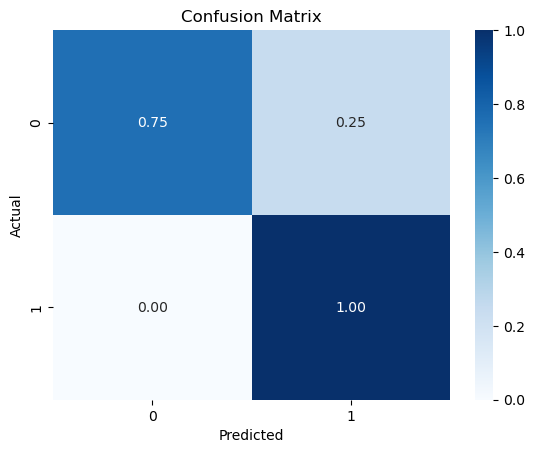

              precision    recall  f1-score   support

           0       1.00      0.75      0.86       240
           1       0.86      1.00      0.92       360

    accuracy                           0.90       600
   macro avg       0.93      0.88      0.89       600
weighted avg       0.92      0.90      0.90       600



In [13]:
y_pred=model_train.predict(X_testT)

# confusion matrix
confusionmatrix=confusion_matrix(y_test,y_pred,normalize='true')


# visualize the confusion matrix in heatmap
plt.figure()
sns.heatmap(confusionmatrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#classification report
report=classification_report(y_test,y_pred)
print(report)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.9016666666666666


In [24]:
Custom_input = input("Please enter a message to predict hippa discrimination: ")

def predict_hippa_detect(input_text):
    processed_text = textpreprocess(input_text)  # Process the text
    tfidf_features = tf.transform([processed_text])  # Transform the processed text to TF-IDF features
    prediction_gender = model_train.predict(tfidf_features)  # Make prediction
    
    if prediction_gender == 1:
        prediction_msg = f'Your message "{input_text}" is classified as Hippa Detection.'
    else:
        prediction_msg = f'Your message "{input_text}" is not classified as Hippa Detection.'

    result = {
        "Text": input_text,
        "Prediction": prediction_msg
    }
    print(prediction_msg)
    return result

rslt = predict_hippa_detect(Custom_input)


Your message "The patient's recent lab results need to be reviewed for any abnormalities." is classified as Hippa Detection.


In [25]:
from pymongo import MongoClient
import json

def load_json_to_mongodb(json_file_path, db_name, collection_name, mongo_uri="mongodb://localhost:27017"):
    # Create a MongoDB client
    client = MongoClient(mongo_uri)

    # Access the database
    db = client[db_name]

    # Access the collection
    collection = db[collection_name]

    # Open the JSON file and load its contents
    with open(json_file_path, 'r') as file:
        data = json.load(file)

        # If the JSON file contains an array of documents
        if isinstance(data, list):
            collection.insert_many(data)
        else:
            collection.insert_one(data)

    print(f"Data from {json_file_path} has been successfully imported into the {db_name}.{collection_name} collection.")


json_file_path = r'/Users/simantinighosh/Desktop/Eitacies_Internship_work/HIPPA_DETECTION/test.json'  
db_name = 'Eitacies_HIPPA_detection'
collection_name = 'Eitacies_HIPPA_detect'

load_json_to_mongodb(json_file_path, db_name, collection_name)

Data from /Users/simantinighosh/Desktop/Eitacies_Internship_work/HIPPA_DETECTION/test.json has been successfully imported into the Eitacies_HIPPA_detection.Eitacies_HIPPA_detect collection.
